In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
import yfinance as yf

In [ ]:
!pip install yfinance

In [23]:
NUM_TRADING_DAYS = 252

NUM_SIMULATIONS = 10000

stocks = ["RELIANCE.NS", "TCS.NS", "HINDUNILVR.NS", "HDFCBANK.NS", "ITC.NS", "LT.NS", "INFY.NS"]

start_date = "2018-10-01"
end_date = "2024-07-01"

In [24]:
stock_data = {}

for stock in stocks:
  ticker = yf.Ticker(stock)
  stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']

stock_prices = pd.DataFrame(stock_data)

In [25]:
stock_prices

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2018-10-01 00:00:00+05:30,1103.541992,1995.629761,1501.627686,968.803223,238.439148,1131.947876,642.441223
2018-10-03 00:00:00+05:30,1079.709717,1913.611938,1480.186279,966.756531,236.914246,1129.544556,626.824463
2018-10-04 00:00:00+05:30,1005.480225,1826.860962,1439.132080,931.820740,230.413544,1140.836060,608.497314
2018-10-05 00:00:00+05:30,939.717529,1860.349609,1425.051270,935.414246,221.906479,1113.174438,623.468689
2018-10-08 00:00:00+05:30,993.967346,1838.141479,1425.782959,925.752197,219.258057,1102.245728,614.735413
...,...,...,...,...,...,...,...
2024-06-24 00:00:00+05:30,2882.949951,3816.800049,2442.199951,1672.400024,423.299988,3531.600098,1527.150024
2024-06-25 00:00:00+05:30,2908.300049,3838.449951,2432.199951,1711.349976,423.299988,3587.800049,1541.949951
2024-06-26 00:00:00+05:30,3028.050049,3855.850098,2445.600098,1701.500000,423.950012,3602.949951,1540.699951


In [26]:
log_returns = np.log(stock_prices / stock_prices.shift(1))

In [27]:
log_returns

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2018-10-01 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-03 00:00:00+05:30,-0.021833,-0.041967,-0.014382,-0.002115,-0.006416,-0.002125,-0.024609
2018-10-04 00:00:00+05:30,-0.071227,-0.046393,-0.028128,-0.036806,-0.027823,0.009947,-0.029674
2018-10-05 00:00:00+05:30,-0.067641,0.018165,-0.009832,0.003849,-0.037620,-0.024546,0.024306
2018-10-08 00:00:00+05:30,0.056125,-0.012009,0.000513,-0.010383,-0.012007,-0.009866,-0.014107
...,...,...,...,...,...,...,...
2024-06-24 00:00:00+05:30,-0.008789,0.001586,0.000369,0.003984,0.008779,-0.000962,-0.003628
2024-06-25 00:00:00+05:30,0.008755,0.005656,-0.004103,0.023023,0.000000,0.015788,0.009645
2024-06-26 00:00:00+05:30,0.040350,0.004523,0.005494,-0.005772,0.001534,0.004214,-0.000811


In [28]:
log_returns = log_returns[1:]

In [29]:
print(log_returns.mean() * NUM_TRADING_DAYS)

RELIANCE.NS      0.185708
TCS.NS           0.119514
HINDUNILVR.NS    0.088850
HDFCBANK.NS      0.098440
ITC.NS           0.102891
LT.NS            0.203483
INFY.NS          0.158766
dtype: float64


In [30]:
print(log_returns.std() * np.sqrt(NUM_TRADING_DAYS))

RELIANCE.NS      0.302019
TCS.NS           0.246873
HINDUNILVR.NS    0.233760
HDFCBANK.NS      0.264268
ITC.NS           0.255781
LT.NS            0.284680
INFY.NS          0.284409
dtype: float64


In [31]:
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []

In [32]:
for _ in range(NUM_SIMULATIONS):
  w = np.random.random(len(stocks))
  w /= np.sum(w)
  portfolio_weights.append(w)
  port_return = np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS
  portfolio_returns.append(port_return)
  port_risk = np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w)))
  portfolio_risks.append(port_risk)

In [33]:
portfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

In [34]:
portfolios = pd.DataFrame({"Return": portfolio_returns, "Risk": portfolio_risks, "Sharpe Ratio": portfolio_returns / portfolio_risks})

In [35]:
portfolios

,Return,Risk,Sharpe Ratio
0,0.122018,0.184333,0.661941
1,0.144812,0.191362,0.756744
2,0.130937,0.176914,0.740118
3,0.135857,0.185963,0.730558
4,0.130280,0.175890,0.740689
...,...,...,...
9995,0.147149,0.190014,0.774408
9996,0.134658,0.175858,0.765718
9997,0.132831,0.177657,0.747681
9998,0.143887,0.180119,0.798844


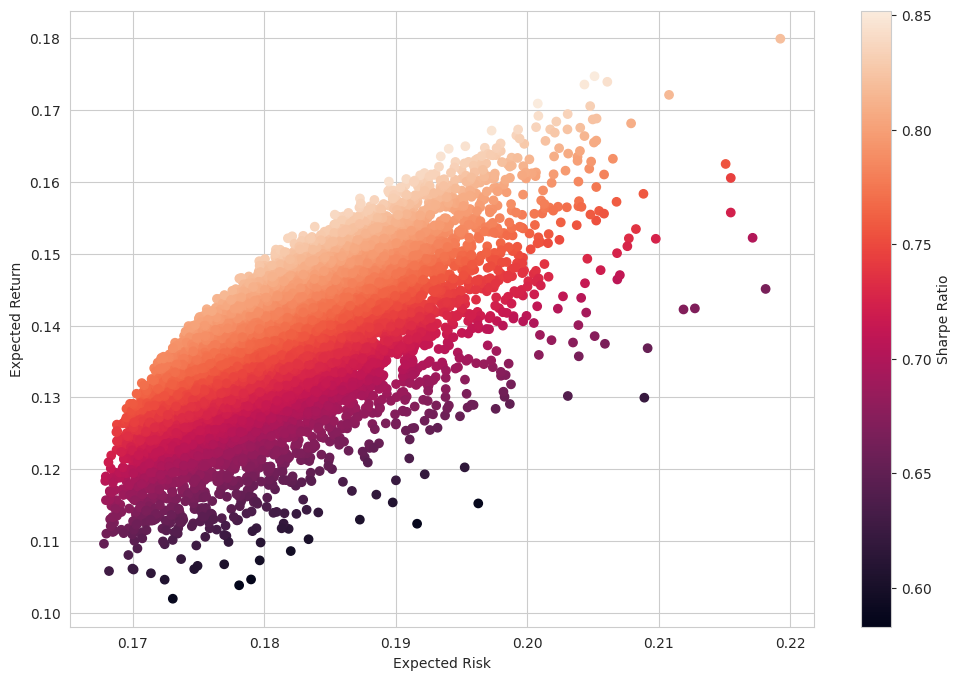

In [36]:
plt.figure(figsize = (12, 8))
plt.scatter(portfolio_risks, portfolio_returns, c = portfolio_returns/portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel("Expected Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.show()

In [37]:
sharpe_ratios = portfolio_returns / portfolio_risks

ind = 0

for i in range(len(sharpe_ratios)):
  if sharpe_ratios[i] == np.amax(sharpe_ratios):
    ind = i

In [38]:
sharpe_ratios[ind]

0.8518439751979453

In [39]:
portfolio_returns[ind]

0.17471850811253042